# 2Dイジング模型の相転移検出　in Deep learning and physics 2020

- 富谷昭夫

ニューラルネットを使って $\beta_{cr} = 0.440686$ を検出する。

In [1]:
#ライブラリのロード
import matplotlib.pyplot as plt
import numpy as np

ここでGoogle drive をマウントしてください。
配位(conf/L32b***_***.npy) はgoogle drive に入れてください。

In [2]:
# もしGoogle drive のマウントが上手く行かない場合に実行してください。
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# もしマウントができていれば配位の数(1900)が表示されます。
!ls -l drive/MyDrive/conf|grep npy|wc -l

1900


In [4]:
# パラメータリスト
prm_list = [
            # beta, file_name, 
             [0.90,"drive/MyDrive/conf/L32b090_"],
             [0.85,"drive/MyDrive/conf/L32b085_"],
            
             [0.80,"drive/MyDrive/conf/L32b080_"],
             [0.70,"drive/MyDrive/conf/L32b070_"],
            
             [0.65,"drive/MyDrive/conf/L32b065_"],
             [0.60,"drive/MyDrive/conf/L32b060_"],
            
             [0.55,"drive/MyDrive/conf/L32b055_"],
             [0.50,"drive/MyDrive/conf/L32b050_"],
            
             [0.47,"drive/MyDrive/conf/L32b047_"],
             [0.42,"drive/MyDrive/conf/L32b042_"],
            
             [0.40,"drive/MyDrive/conf/L32b040_"],
             [0.35,"drive/MyDrive/conf/L32b035_"],
            
             [0.30,"drive/MyDrive/conf/L32b030_"],
             [0.25,"drive/MyDrive/conf/L32b025_"],
            
             [0.20,"drive/MyDrive/conf/L32b020_"],
             [0.15,"drive/MyDrive/conf/L32b015_"],
            
             [0.10,"drive/MyDrive/conf/L32b010_"],
             [0.05,"drive/MyDrive/conf/L32b005_"],
            
             [0.00,"drive/MyDrive/conf/L32b000_"]
]
# beta19 x conf100 = 1900 data

読み込めているかのテスト
beta=090


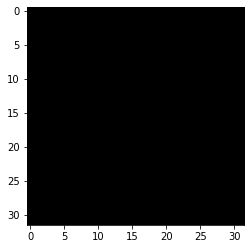

beta=090


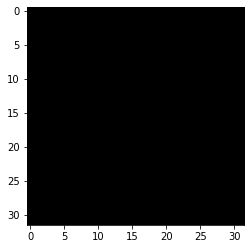

beta=040


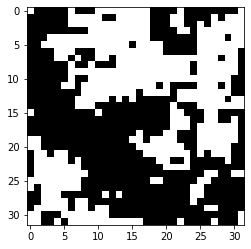

beta=040


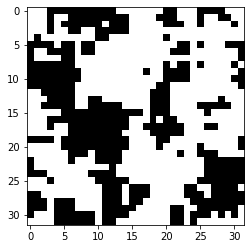

beta=000


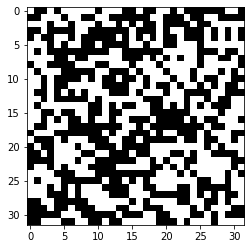

beta=000


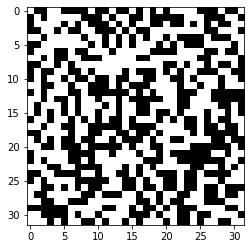

In [5]:
print("読み込めているかのテスト")
for iconf in range(2):
  print("beta=090")
  file = f"drive/MyDrive/conf/L32b090_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.show()
for iconf in range(2):
  print("beta=040")
  file = f"drive/MyDrive/conf/L32b040_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.show()
for iconf in range(2):
  print("beta=000")
  file = f"drive/MyDrive/conf/L32b000_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.show()

#教師ラベルの設定とデータの分割

In [6]:
nconf = 100 # The number of configurations per beta
betacr = 0.440686 # critical temp for 2d ising
#
data = []
labels = []
betas = []
nprm=len(prm_list)
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  fname = prm_list[ibeta][1]
  for itrj in range(nconf):
    npsc = np.load(f"{fname}{itrj}.npy")
    data.append(npsc)
    if beta > betacr:
      labels.append([0,1])
    else:
      labels.append([1,0])
    betas.append(beta)
data = np.array(data)
labels = np.array(labels)
#
train_data=data[0::2]
train_labels=labels[0::2]
train_betas=betas[0::2] # this will not be used in training
#
val_data=data[1::2]
val_labels=labels[1::2]
val_betas=betas[1::2]
#
# beta18 x conf100 = 1800 data
# beta18 x conf50 = 900 training_data(18x50,same beta = 50) + 900 val_data

In [7]:
print("train_data.shape = ", train_data.shape)
print("val_data.shape = ", val_data.shape)

train_data.shape =  (950, 32, 32)
val_data.shape =  (950, 32, 32)


# Tensorflow

In [8]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.0


## Model def

In [9]:
tf.random.set_seed(12345)
model_FC = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [10]:
model_FC.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_FC.fit(train_data, train_labels, epochs=10)

Epoch 1/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.7937
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000


0.9 5.0047383e-05 0.9999499
0.85 5.3264852e-05 0.9999468
0.8 5.6549125e-05 0.9999435
0.7 7.166389e-05 0.9999283
0.65 8.632502e-05 0.99991363
0.6 0.00013874182 0.9998613
0.55 0.00022765207 0.99977225
0.5 0.001062058 0.99893785
0.47 0.0024133257 0.9975867
0.42 0.90538 0.09461986
0.4 0.94069856 0.059301432
0.35 0.9481255 0.051874563
0.3 0.9558836 0.044116348
0.25 0.9631257 0.03687429
0.2 0.9430732 0.05692683
0.15 0.952888 0.04711199
0.1 0.95084566 0.049154356
0.05 0.89974594 0.10025407
0.0 0.93154144 0.06845851


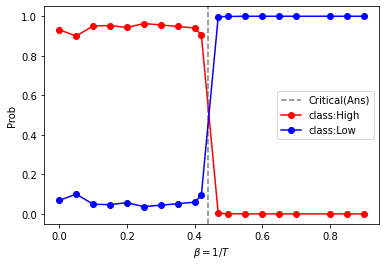

In [12]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_FC(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x)
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical(Ans)")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

0.42 0.90538
0.47 0.0024133257
0.42 0.09461986
0.47 0.9975867
sol x,y =  [0.49999998 0.44244712]


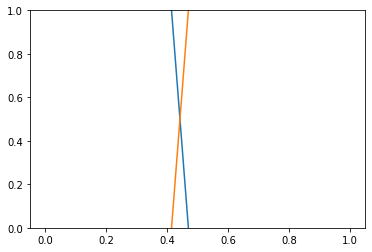

Relative error = 0.4 %


In [13]:
# 交点を求める。
u1,v1 = xs[9],y1s[9]
u2,v2 = xs[8],y1s[8]
w1,t1 = xs[9],y2s[9]
w2,t2 = xs[8],y2s[8]
print(u1,v1)
print(u2,v2)
#
print(w1,t1)
print(w2,t2)

from numpy.linalg import solve

tan1=(v2-v1)/(u2-u1)
tan2=(t2-t1)/(w2-w1)
MatA = [[1, -tan1],
        [1, -tan2]]
 
vecB = [v1-tan1*u1,
        t1-tan2*w1]
#
sol = solve(MatA, vecB)
print("sol x,y = ", sol)
#
xx = np.linspace(0,1)
yy = tan1*(xx-u1)+v1
plt.plot(xx,yy)
#
yy = tan2*(xx-w1)+t1
plt.plot(xx, yy)
plt.ylim(0,1)
plt.show()
#
beta_cr = 0.440686
er = round(abs(beta_cr - sol[1])/beta_cr  *100,2)
print(f"Relative error = {er} %")

# Convolutional neural network

CNN

In [14]:
tf.random.set_seed(12345)
model_CNN = keras.Sequential([
    keras.layers.Conv2D(filters =  1,
                        kernel_size=(4, 4), 
                        activation='relu', 
                        input_shape=(32, 32, 1) 
                        ),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [15]:
model_CNN.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
train_data_cnn=np.array(train_data)
train_data_cnn = train_data_cnn.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
train_data_cnn.shape

(950, 32, 32, 1)

In [17]:
model_CNN.fit(train_data_cnn, train_labels, epochs=10)

Epoch 1/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4084 - accuracy: 0.8053
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.1618 - accuracy: 0.9789
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9989
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 8/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 9/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 10/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000


0.9 4.724294e-05 0.9999527
0.85 5.3331452e-05 0.9999468
0.8 5.820123e-05 0.99994177
0.7 8.533801e-05 0.9999145
0.65 0.00013153494 0.99986833
0.6 0.00026019898 0.99973977
0.55 0.00084821106 0.9991518
0.5 0.008376382 0.99162364
0.47 0.025804238 0.9741957
0.42 0.96269906 0.037300967
0.4 0.9511653 0.048834678
0.35 0.97298384 0.027016189
0.3 0.9686726 0.03132741
0.25 0.956013 0.043986935
0.2 0.9604688 0.039531127
0.15 0.9660089 0.033991136
0.1 0.94452214 0.055477872
0.05 0.95157564 0.04842432
0.0 0.95175123 0.048248824


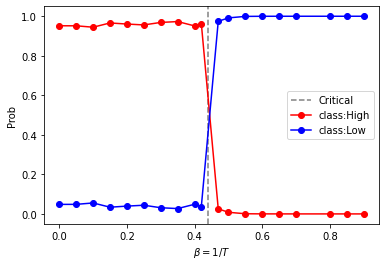

In [18]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_CNN(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x )
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

0.42 0.96269906
0.47 0.025804238
0.42 0.037300967
0.47 0.9741957
sol x,y =  [0.5        0.44469322]


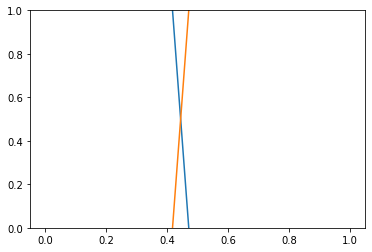

Relative error = 0.91 %


In [19]:
u1,v1 = xs[9],y1s[9]
u2,v2 = xs[8],y1s[8]
w1,t1 = xs[9],y2s[9]
w2,t2 = xs[8],y2s[8]
print(u1,v1)
print(u2,v2)
#
print(w1,t1)
print(w2,t2)

from numpy.linalg import solve

tan1=(v2-v1)/(u2-u1)
tan2=(t2-t1)/(w2-w1)
MatA = [[1, -tan1],
        [1, -tan2]]
 
vecB = [v1-tan1*u1,
        t1-tan2*w1]
#
sol = solve(MatA, vecB)
print("sol x,y = ", sol)
#
xx = np.linspace(0,1)
yy = tan1*(xx-u1)+v1
plt.plot(xx,yy)
#
yy = tan2*(xx-w1)+t1
plt.plot(xx, yy)
plt.ylim(0,1)
plt.show()
#
beta_cr = 0.440686
er = round(abs(beta_cr - sol[1])/beta_cr  *100,2)
print(f"Relative error = {er} %")